In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("USA_cars_datasets.csv")

In [3]:
df.shape

(2499, 13)

In [4]:
df.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


 ` Removing OutLiers`
 * Boxplot
 * Stats

 `BoxPlot Method`

C:\Users\Abdullah Fazili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

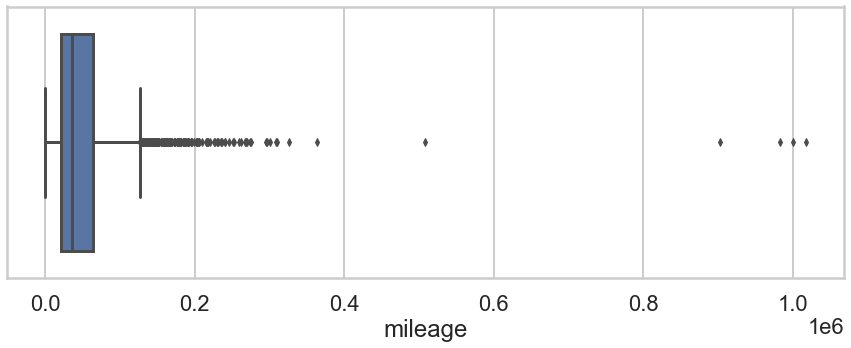

In [5]:
sns.set_theme(
    style="whitegrid",
    context='poster'
)
plt.figure(figsize=(15,5))
sns.boxplot(df['mileage'])


In [6]:
q1 = df['mileage'].quantile(0.25)
q1

21466.5

In [7]:
q1 = df['mileage'].quantile(0.25)
q3 = df['mileage'].quantile(0.75)
IQR = q3 - q1
u_bound = q3 + (1.5 * IQR)
l_bound = q1 - (1.5 * IQR)
filtered_data = df[(df['mileage'] < u_bound) & (df['mileage'] > l_bound)]

In [8]:
IQR = q3 - q1
IQR

42006.0

In [9]:
u_bound = q3 + (1.5 * IQR)
l_bound = q1 - (1.5 * IQR)
filtered_data = df[(df['mileage'] < u_bound) & (df['mileage'] > l_bound)]

In [10]:
print(q1,q3,IQR,u_bound,l_bound)

21466.5 63472.5 42006.0 126481.5 -41542.5


In [11]:
filtered_data = df[(df['mileage'] < u_bound) & (df['mileage'] > l_bound)]

In [12]:
filtered_data.shape

(2310, 13)

In [13]:
df.shape

(2499, 13)

 `Information loss for Boxplot method`

In [14]:
2499-2310

189

In [15]:
round((189/2499)*100,2)

7.56

* Approximately 7.6% Info Loss

C:\Users\Abdullah Fazili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

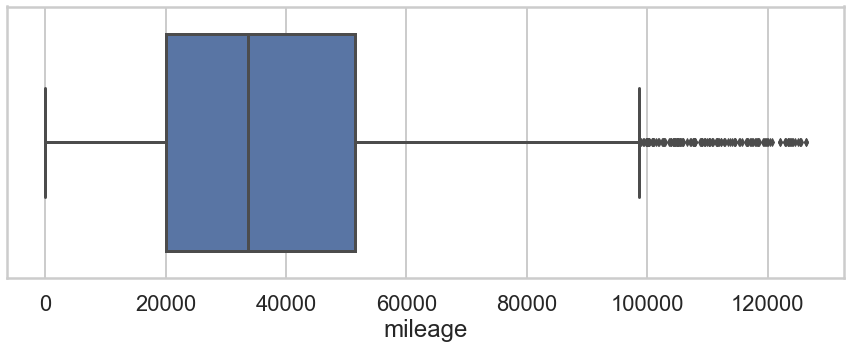

In [16]:
sns.set_theme(
    style="whitegrid",
    context='poster'
)
plt.figure(figsize=(15,5))
sns.boxplot(filtered_data['mileage'])


 `Static `
 * static threshold of 95 , 99 %ile (value beyond this)
 * static threshold of 0.05 or 0.01

In [17]:
u_thresh = df['mileage'].quantile(0.99)
l_thresh = df['mileage'].quantile(0.01)
u_thresh = round(u_thresh,2)
l_thresh = round(l_thresh,2)

In [18]:
print(u_thresh,'and',l_thresh)

235380.64 and 665.6


In [19]:
filtered_data_2 = df[(df['mileage'] < u_thresh) & (df['mileage'] > l_thresh)]

In [20]:
filtered_data_2.shape

(2449, 13)

In [21]:
2499-2449

50

In [22]:
round((50/2499)*100,2)

2.0

` Approximately 2% loss in our data`

C:\Users\Abdullah Fazili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

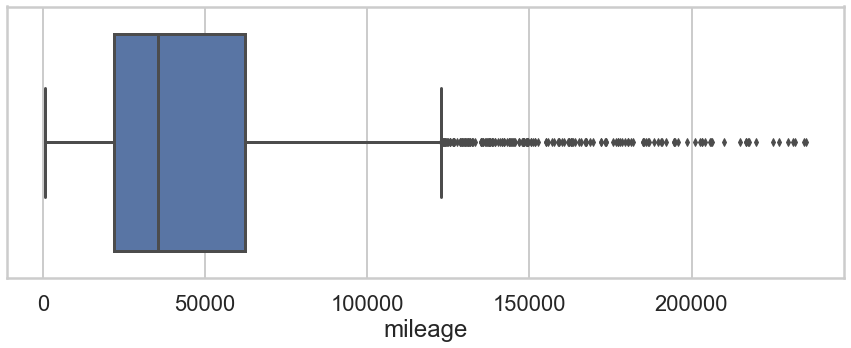

In [23]:
sns.set_theme(
    style="whitegrid",
    context='poster'
)
plt.figure(figsize=(15,5))
sns.boxplot(filtered_data_2['mileage'])


## Plotting a histogram for data containing outliers

<AxesSubplot:xlabel='mileage', ylabel='Count'>

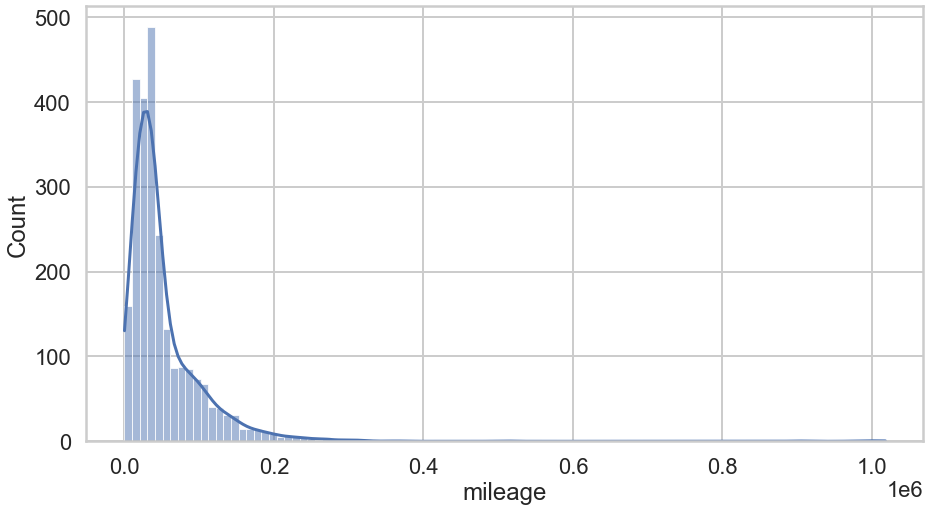

In [24]:
sns.set_theme(
    style="whitegrid",
    context='poster'
)
plt.figure(figsize=(15,8))
sns.histplot(df['mileage'],bins=100,kde=True)

## Histogram without outliers

<AxesSubplot:xlabel='mileage', ylabel='Count'>

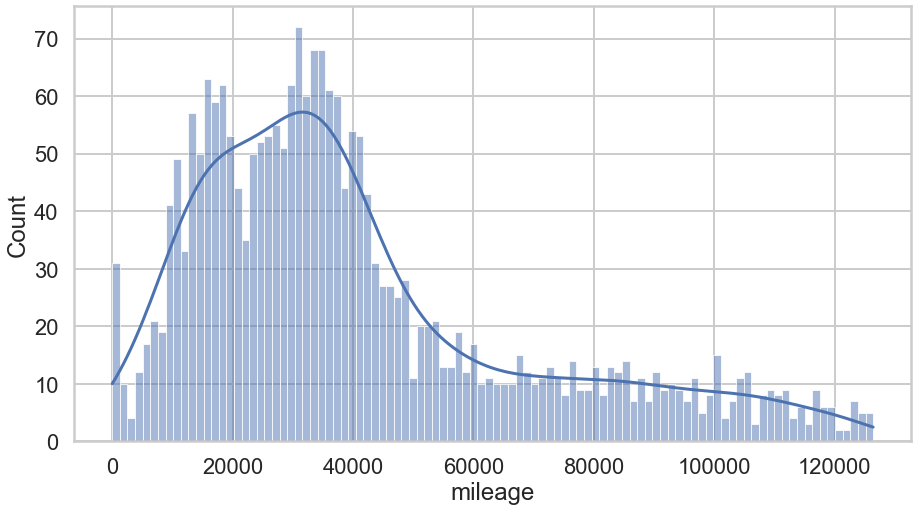

In [25]:
sns.set_theme(
    style="whitegrid",
    context='poster'
)
plt.figure(figsize=(15,8))
sns.histplot(filtered_data['mileage'],bins=100,kde=True)